### Import Required Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,5
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load & Read Data

In [4]:
df=pd.read_csv("D:/PGP IN DATA SCIENCE with Careerera/Data Sets/data-for-time-series/Tractor-Sales.csv")
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
df.shape

(144, 2)

In [6]:
df.size

288

In [7]:
df.dtypes

Month-Year                object
Number of Tractor Sold     int64
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Month-Year'], format='%b-%y')

In [9]:
df.dtypes

Month-Year                        object
Number of Tractor Sold             int64
Date                      datetime64[ns]
dtype: object

In [10]:
df.rename(columns={"Number of Tractor Sold":"Sales"}, inplace=True)
df.head()

,Month-Year,Sales,Date
0,Jan-03,141,2003-01-01
1,Feb-03,157,2003-02-01
2,Mar-03,185,2003-03-01
3,Apr-03,199,2003-04-01
4,May-03,203,2003-05-01


In [11]:
#drop Month-Year
df.drop('Month-Year', axis=1, inplace=True)

In [12]:
#set "Date" as index
df.set_index("Date", inplace=True)
df.head()

,Sales
Date,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


In [13]:
yt=df.Sales
yt

Date
2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
             ... 
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, Length: 144, dtype: int64

In [14]:
train=yt[:"2014-06-01"]
test=yt["2014-07-01":]

### Check for Stationary

* 1) By Graph

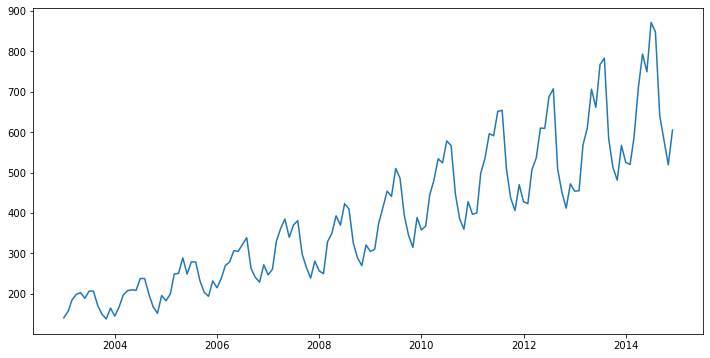

In [17]:
plt.figure(figsize=(12,6))
plt.plot(yt);

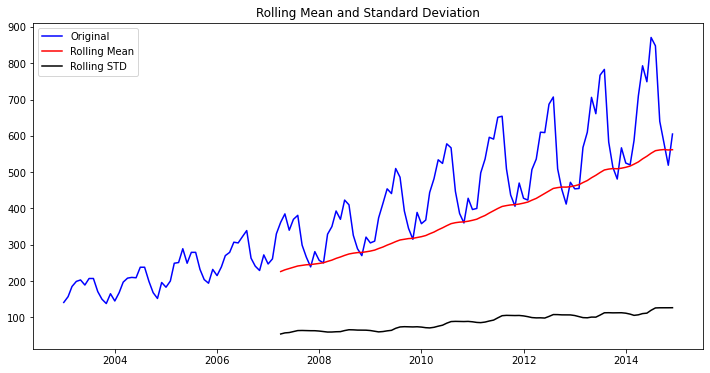

In [18]:
plt.figure(figsize=(12,6))
plt.plot(yt, color='blue',label="Original")
plt.plot(yt.rolling(window=52,center=False).mean(), color='red',label="Rolling Mean")
plt.plot(yt.rolling(window=52,center=False).std(), color='black',label="Rolling STD")
plt.legend()
plt.title("Rolling Mean and Standard Deviation")
plt.show()

From graph we cannot say our Series in stationary because, we can clearly see Seasonality & Trend. Moving average is increaseing, standard deviation is almost constant.

* 2)  Apply ADfuller test-

In [19]:
from statsmodels.tsa.stattools import adfuller

st=adfuller(yt)
st

(1.1088250591467286,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

Write above in more suitable manner

In [20]:
print("Results Of Dickey-Fuller Test")
dftest=adfuller(yt)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-Value','Lags Used',
                                       'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results Of Dickey-Fuller Test
Test Statistics                  1.108825
p-Value                          0.995291
Lags Used                       14.000000
Number of Observations used    129.000000
Critical value (1%)             -3.482088
Critical value (5%)             -2.884219
Critical value (10%)            -2.578864
dtype: float64


As p-value is greater than alpha(0.05), Series is not Stationary.

We can take difference of series and aaply that to adfuller test % check the p-value.

In [21]:
yt1=yt.diff(3).dropna()
yt1

Date
2003-04-01     58.0
2003-05-01     46.0
2003-06-01      4.0
2003-07-01      8.0
2003-08-01      4.0
              ...  
2014-08-01     55.0
2014-09-01   -109.0
2014-10-01   -290.0
2014-11-01   -329.0
2014-12-01    -35.0
Name: Sales, Length: 141, dtype: float64

In [22]:
print("Results Of Dickey-Fuller Test")
dftest=adfuller(yt1)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-Value','Lags Used',
                                       'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results Of Dickey-Fuller Test
Test Statistics                 -2.936724
p-Value                          0.041241
Lags Used                       10.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


After taking 3 difference p-value is less than alpha(0.05), hence series is approaching toward stationary.

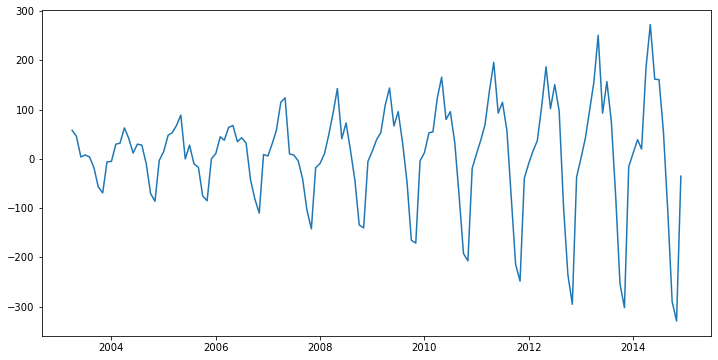

In [23]:
plt.figure(figsize=(12,6))
plt.plot(yt1)
plt.show()

Now we can see the Trend but not like before, Hence Series is aprroaching to Stationary.

We can also try log tranformation and then check the p-value.

In [24]:
yt1=np.log(yt).diff(2).dropna()
yt1

Date
2003-03-01    0.271596
2003-04-01    0.237059
2003-05-01    0.092850
2003-06-01   -0.051558
2003-07-01    0.019513
                ...   
2014-08-01    0.124142
2014-09-01   -0.308174
2014-10-01   -0.378130
2014-11-01   -0.209564
2014-12-01    0.040478
Name: Sales, Length: 142, dtype: float64

In [25]:
print("Results Of Dickey-Fuller Test")
dftest=adfuller(yt1)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-Value','Lags Used',
                                       'Number of Observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Results Of Dickey-Fuller Test
Test Statistics                 -3.200722
p-Value                          0.019943
Lags Used                       11.000000
Number of Observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


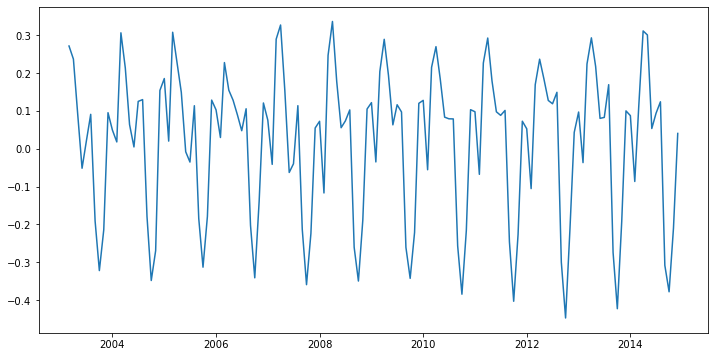

In [26]:
plt.figure(figsize=(12,6))
plt.plot(yt1)
plt.show()

Now the trend is gone and p-value(0.019943) is less than alpha value(0.05) hence Series Stationary.

#### To Know p,d,q,P,D,Q,Period. Plot Autocorelation & Partial-Autocorelation graph.

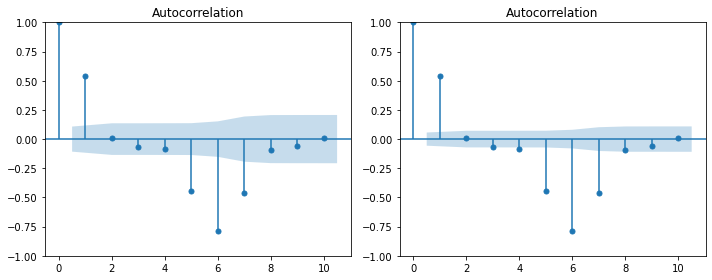

In [27]:
import statsmodels.tsa.api as smt
fig,axes=plt.subplots(1,2,sharex=False,sharey=False)
fig.set_figwidth(10)
fig.set_figheight(4)
smt.graphics.plot_acf(yt1, lags=10, ax=axes[0], alpha=0.2) # Autocorelation
smt.graphics.plot_acf(yt1, lags=10, ax=axes[1], alpha=0.5) # Partial-Autocorelation
plt.tight_layout()

* q=After how many Lags Series is either 0 or Negative in Autocorelation
* p=After how many Lags Series is either 0 or Negative in Partial-Autocorelation
* d=After how many difference the series become Stationary
* Period- After how many Months Pattern is repeating.
* To get P,D,Q create new series using our series which is grouped up with 12 years(in our case) ans sum up each year and do the same thing which we did while calculating p,q,d.

In [28]:
yt_log=np.log(yt).dropna()
yt_log

Date
2003-01-01    4.948760
2003-02-01    5.056246
2003-03-01    5.220356
2003-04-01    5.293305
2003-05-01    5.313206
                ...   
2014-08-01    6.742881
2014-09-01    6.461468
2014-10-01    6.364751
2014-11-01    6.251904
2014-12-01    6.405228
Name: Sales, Length: 144, dtype: float64

In [51]:
train=yt_log[:"2014-06-01"]
test=yt_log["2014-07-01":]

In [52]:
train

Date
2003-01-01    4.948760
2003-02-01    5.056246
2003-03-01    5.220356
2003-04-01    5.293305
2003-05-01    5.313206
                ...   
2014-02-01    6.253829
2014-03-01    6.375025
2014-04-01    6.565265
2014-05-01    6.675823
2014-06-01    6.618739
Name: Sales, Length: 138, dtype: float64

In [53]:
test

Date
2014-07-01    6.769642
2014-08-01    6.742881
2014-09-01    6.461468
2014-10-01    6.364751
2014-11-01    6.251904
2014-12-01    6.405228
Name: Sales, dtype: float64

#### Now Create model & Train it

In [36]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train, order=(1,2,1), seasonal_order=(1,0,1,12),
                               enforce_stationarity=False,
                                enforce_invertibility=False).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  136
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 174.404
Date:                            Tue, 20 Dec 2022   AIC                           -338.808
Time:                                    12:05:08   BIC                           -324.871
Sample:                                03-01-2003   HQIC                          -333.148
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1253      0.088     -1.417      0.157      -0.299       0.048
ma.L1         -1.0000    182.078   

In [38]:
y_fcast=np.exp(model.forecast(6))
y_fcast

2014-07-01    1.073361
2014-08-01    1.128906
2014-09-01    0.740949
2014-10-01    0.640452
2014-11-01    0.794180
2014-12-01    1.061687
Freq: MS, Name: predicted_mean, dtype: float64

In [39]:
y_orig=np.exp(test)
y_orig

Date
2014-07-01    1.098361
2014-08-01    1.132176
2014-09-01    0.734788
2014-10-01    0.685142
2014-11-01    0.810937
2014-12-01    1.041308
Name: Sales, dtype: float64

In [40]:
print("MSE", np.mean((y_fcast-y_orig)**2))

MSE 0.0005611464594526579


To choose better values of order & seasonal_order use itertool method.

In [41]:
p=[0,1,2]
d=[0,1,2]
q=[1,2,3]
P=[0,1,2]
D=[0]
Q=[0,1,2]
period=12

In [42]:
import itertools

pdq=list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(P,D,Q))]

In [43]:
best_pdq=None
best_PDQ=None
best_mse=np.inf

for i in pdq:
    for j in seasonal_pdq:
        model=sm.tsa.statespace.SARIMAX(train, order=i, seasonal_order=j,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False).fit()
        fcast=np.exp(model.forecast(6))
        test=np.exp(test)
        mse=np.mean((fcast-test)**2)
        if mse<best_mse:
            best_pdq=i
            best_PDQ=j
            best_mse=mse

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so infer

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so infer

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [44]:
best_pdq

(0, 0, 1)

In [45]:
best_PDQ

(0, 0, 0, 12)

In [50]:
best_mse

0.04175266426616117

Lets use above values to train our mode

In [54]:
model=sm.tsa.statespace.SARIMAX(train, order=(0, 0, 1), seasonal_order=(0, 0, 0, 12),
                               enforce_stationarity=False,
                                enforce_invertibility=False).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
fcast=model.forecast(6)
np.exp(fcast)

2014-07-01    33.179216
2014-08-01     1.000000
2014-09-01     1.000000
2014-10-01     1.000000
2014-11-01     1.000000
2014-12-01     1.000000
Freq: MS, Name: predicted_mean, dtype: float64

In [59]:
np.exp(test)

Date
2014-07-01    871.0
2014-08-01    848.0
2014-09-01    640.0
2014-10-01    581.0
2014-11-01    519.0
2014-12-01    605.0
Name: Sales, dtype: float64

In [62]:
print("MSE",np.mean((np.exp(fcast)-np.exp(test))**2))

MSE 466202.27770284243


#### Actuual vs Predicted Values

d=pd.DataFrame(fcast.reset_index())
d.columns=["Date","Predicted"]

d1=pd.DataFrame(test.reset_index())
d1.columns=["Date","Actual"]
final=pd.merge(d,d1,on="Date",how="inner")
plt.plot(final["Date"],final["Predicted"], label="Predicted Value", color="red")
plt.plot(final["Date"],final["Actual"], label="Actual Values",color="green")
plt.legend()
plt.show()

Forecast for Unseen Data

fcast=model.forecast(18)
fcast

plt.figure(figsize=(12,6))
plt.plot(train, label='Tractor Sales')
plt.plot(ets_fit.fittedvalues, label='Fittel Value')
plt.plot(fcast, label='Forecasted Sale')
plt.legend()
plt.show()